In [2]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from pathlib import Path

In [18]:
root = r"D:\Desktop\智慧能源专项赛-赛题二数据\分布式历史数据\FBS_1_history.csv"
data = pd.read_csv(str(root))
data['TIMESTAMP'] = pd.to_datetime(data['TIMESTAMP'])
data = data.dropna()
correlation_matrix = data.corr()

correlation_matrix
    

,POWER,WEATHER1_TMP,WEATHER1_PRES,WEATHER1_RAINFALL,WEATHER1_TCC,WEATHER1_IR,WEATHER1_WS,WEATHER2_TMP,WEATHER2_PRES,WEATHER2_RAINFALL,WEATHER2_TCC,WEATHER2_IR,WEATHER2_WS
POWER,1.000000,0.679818,-0.007063,-0.125012,-0.119714,0.871612,-0.106971,0.716361,0.034189,-0.120935,-0.114743,0.880902,-0.068763
WEATHER1_TMP,0.679818,1.000000,-0.197761,-0.130798,-0.114248,0.729023,0.032093,0.976696,-0.344652,-0.112809,-0.117085,0.727643,0.083567
WEATHER1_PRES,-0.007063,-0.197761,1.000000,-0.139255,-0.104809,0.001900,-0.162839,-0.231382,0.206906,-0.131844,-0.113534,0.005385,-0.180208
WEATHER1_RAINFALL,-0.125012,-0.130798,-0.139255,1.000000,0.266294,-0.135483,0.207858,-0.108509,0.052258,0.939618,0.309077,-0.135872,0.271538
WEATHER1_TCC,-0.119714,-0.114248,-0.104809,0.266294,1.000000,-0.185877,0.183934,-0.086974,0.064549,0.291673,0.818381,-0.171084,0.217508
WEATHER1_IR,0.871612,0.729023,0.001900,-0.135483,-0.185877,1.000000,-0.159640,0.755570,-0.025953,-0.148059,-0.184677,0.984945,-0.123963
WEATHER1_WS,-0.106971,0.032093,-0.162839,0.207858,0.183934,-0.159640,1.000000,0.003585,-0.095754,0.243979,0.236869,-0.173215,0.907658
WEATHER2_TMP,0.716361,0.976696,-0.231382,-0.108509,-0.086974,0.755570,0.003585,1.000000,-0.286851,-0.101517,-0.094918,0.771771,0.051976
WEATHER2_PRES,0.034189,-0.344652,0.206906,0.052258,0.064549,-0.025953,-0.095754,-0.286851,1.000000,0.057935,0.128792,-0.028350,-0.259758
WEATHER2_RAINFALL,-0.120935,-0.112809,-0.131844,0.939618,0.291673,-0.148059,0.243979,-0.101517,0.057935,1.000000,0.348402,-0.150610,0.311289


In [19]:
target_correlation = correlation_matrix['POWER'].abs().sort_values(ascending=False)
target_correlation

POWER                1.000000
WEATHER2_IR          0.880902
WEATHER1_IR          0.871612
WEATHER2_TMP         0.716361
WEATHER1_TMP         0.679818
WEATHER1_RAINFALL    0.125012
WEATHER2_RAINFALL    0.120935
WEATHER1_TCC         0.119714
WEATHER2_TCC         0.114743
WEATHER1_WS          0.106971
WEATHER2_WS          0.068763
WEATHER2_PRES        0.034189
WEATHER1_PRES        0.007063
Name: POWER, dtype: float64

In [35]:
filter_features = ["WEATHER2_IR", "WEATHER1_IR", "WEATHER2_TMP", "WEATHER1_TMP"]
features = data[filter_features]
power = data["POWER"]
X_train, X_test, y_train, y_test = train_test_split(features, power, test_size=0.2, shuffle=False)
# X_train, X_test = X_train.dropna(), X_test.dropna()
# y_train, y_test = y_train.dropna(), y_test.dropna()
X_train, X_test = X_train.fillna(method='bfill'), X_test.fillna(method='bfill')
y_train, y_test = y_train.fillna(value=0), y_test.fillna(value=0)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((9090, 4), (2273, 4), (9090,), (2273,))

In [36]:
 # 创建随机森林回归模型对象
rf_model = RandomForestRegressor()

# 使用训练集训练模型
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

y_pred.shape
y_pred

array([ 6206.632079, 12952.244325, 13830.921791, ...,    18.308594,
           0.      ,     0.      ])

In [14]:
# 计算均方误差（Mean Squared Error）
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 15773721.823606467


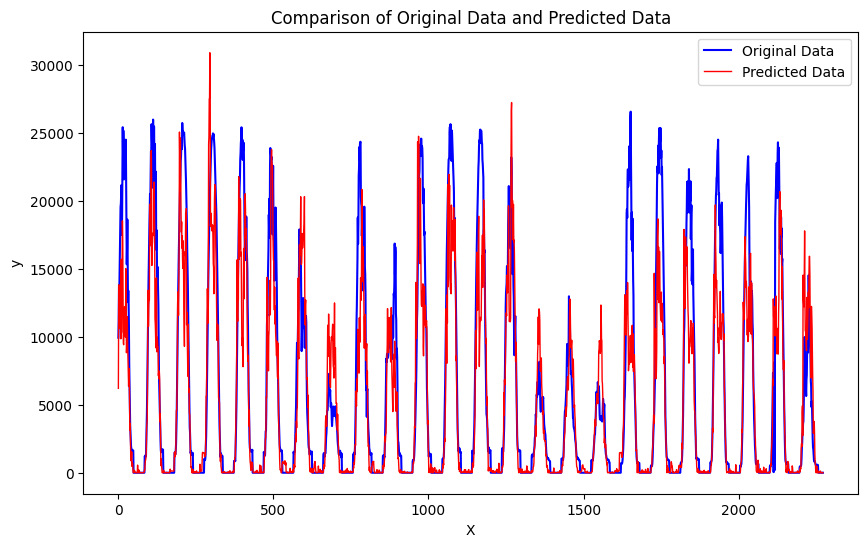

In [37]:
import matplotlib.pyplot as plt

# 绘制原始数据和预测结果的对比图
plt.figure(figsize=(10, 6))
plt.plot(np.arange(0, len(y_pred), 1), y_test, color='blue', label='Original Data')
plt.plot(np.arange(0, len(y_pred), 1), y_pred, color='red', linewidth=1, label='Predicted Data')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Comparison of Original Data and Predicted Data')
plt.legend()
plt.show()

In [42]:
# 读取10.1 到 10.7的天气预测数据
weather_data = r"D:\Desktop\智慧能源专项赛-赛题二数据\天气预报数据\分布式功率预测天气预报数据-23年10月1日-10月7日\FBS_1_20231001-20231007_weather.csv"
data_predict = pd.read_csv(weather_data)
# data_predict['TIMESTAMP'] = pd.to_datetime(data_predict['TIMESTAMP'])
data_predict = data_predict[filter_features]
data_predict.shape

Index(['TIMESTAMP', 'WEATHER1_TMP', 'WEATHER1_PRES', 'WEATHER1_RAINFALL',
       'WEATHER1_TCC', 'WEATHER1_IR', 'WEATHER1_WS', 'WEATHER2_TMP',
       'WEATHER2_PRES', 'WEATHER2_RAINFALL', 'WEATHER2_TCC', 'WEATHER2_IR',
       'WEATHER2_WS'],
      dtype='object')